# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi yang lebih menarik
from sklearn.preprocessing import StandardScaler  # Untuk preprocessing
from sklearn.preprocessing import LabelEncoder # Encoding Data Kategorikal

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Muat dataset
df = pd.read_csv('IEA_Global_EV_Data_2024.csv')

# Tampilkan beberapa baris pertama dataset
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Informasi umum: tipe data, jumlah non-null
df.info()

# Ukuran dataset (jumlah baris dan kolom)
df.shape

# Nama kolom
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [4]:
# Statistik deskriptif kolom numerik
df.describe()

# Nilai unik pada kolom kategorikal
df.select_dtypes(include='object').nunique()


,0
region,54
category,3
parameter,8
mode,5
powertrain,6
unit,6


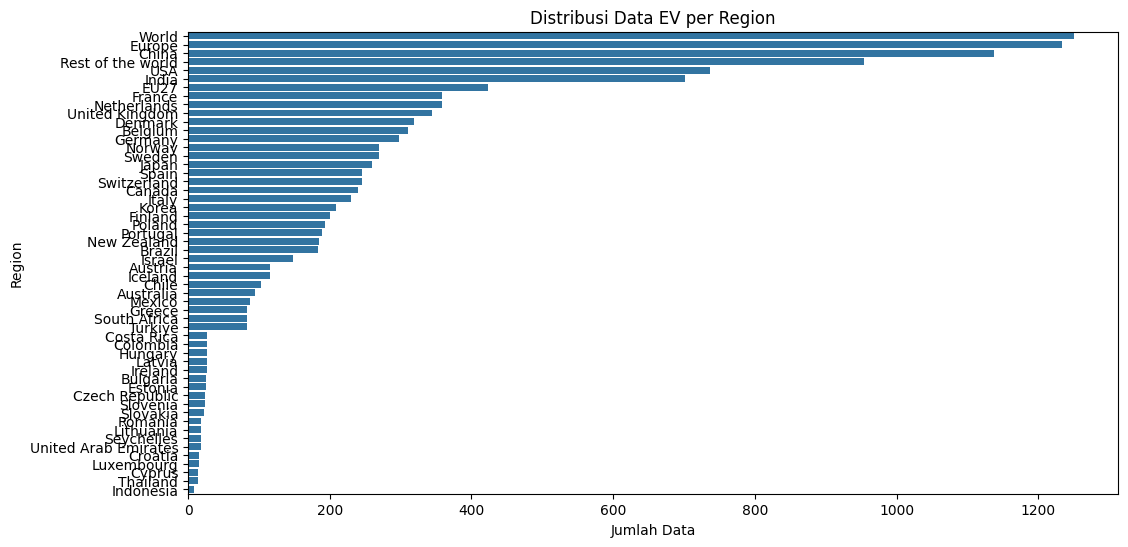

In [5]:
# Distribusi data per wilayah (region)
plt.figure(figsize=(12,6))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index)
plt.title('Distribusi Data EV per Region')
plt.xlabel('Jumlah Data')
plt.ylabel('Region')
plt.show()

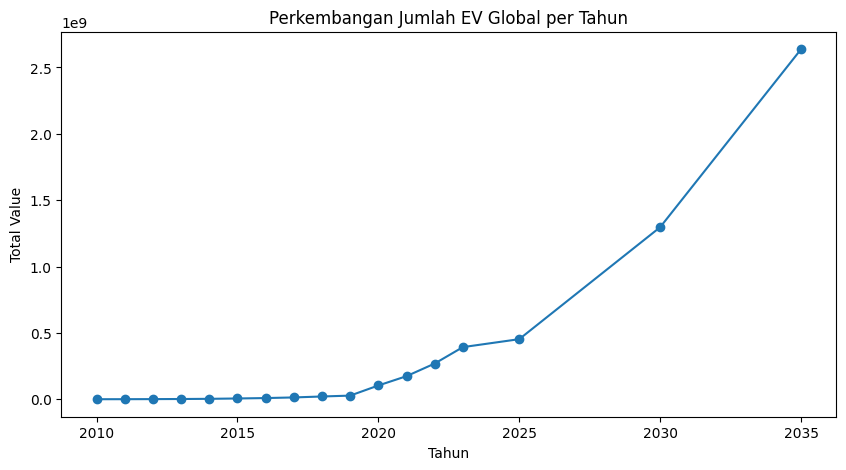

In [6]:
# Tren perkembangan EV global per tahun
plt.figure(figsize=(10,5))
df.groupby('year')['value'].sum().plot(kind='line', marker='o')
plt.title('Perkembangan Jumlah EV Global per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Value')
plt.show()


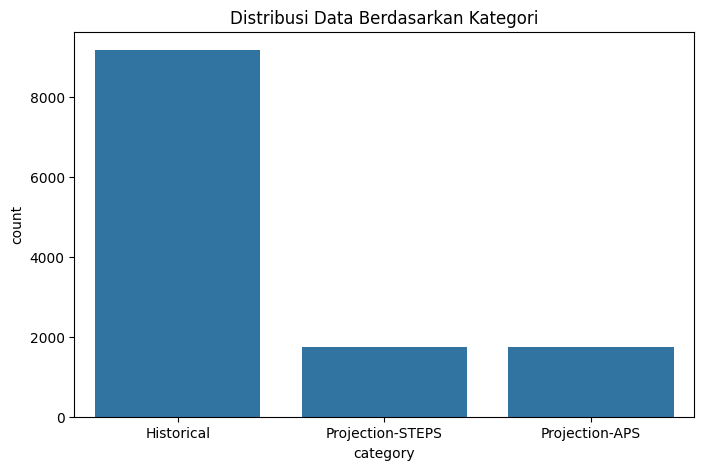

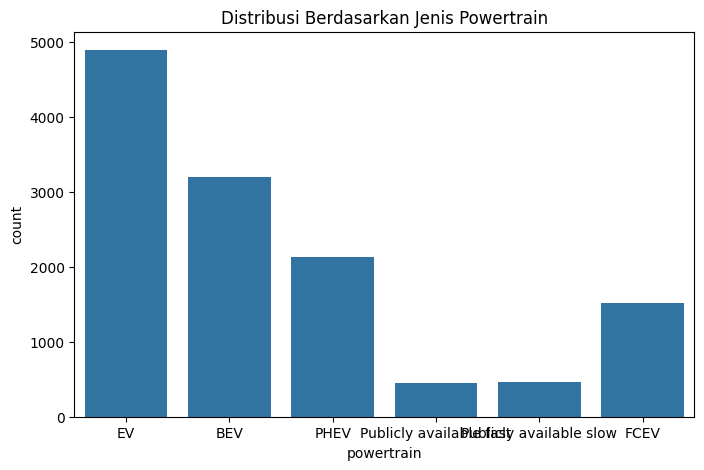

In [7]:
# Distribusi berdasarkan kategori dan powertrain
plt.figure(figsize=(8,5))
sns.countplot(x='category', data=df)
plt.title('Distribusi Data Berdasarkan Kategori')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='powertrain', data=df)
plt.title('Distribusi Berdasarkan Jenis Powertrain')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Cek missing values
df.isnull().sum()

# Jika ada, bisa diisi atau dihapus tergantung konteks
df = df.dropna()  # atau df.fillna(value)


In [9]:
# Cek duplikasi
df.duplicated().sum()

# Hapus duplikasi jika ada
df = df.drop_duplicates()


In [10]:
scaler = StandardScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

In [11]:
encoder = LabelEncoder()
for col in ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']:
    df[col] = encoder.fit_transform(df[col])

In [12]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value,value_scaled
0,0,0,4,1,1,2011,5,0.00039,-0.062297
1,0,0,2,1,1,2011,5,0.00650,-0.062297
2,0,0,1,1,0,2011,3,49.00000,-0.062290
3,0,0,3,1,0,2011,3,49.00000,-0.062290
4,0,0,3,1,0,2012,3,220.00000,-0.062265


In [13]:
df.shape        # jumlah baris dan kolom
df.columns      # daftar nama kolom


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value', 'value_scaled'],
      dtype='object')

In [14]:
df.describe()

,region,category,parameter,mode,powertrain,year,unit,value,value_scaled
count,12654.000000,12654.000000,12654.000000,12654.000000,12654.000000,12654.000000,12654.000000,1.265400e+04,1.265400e+04
mean,28.175992,0.412360,2.651731,1.747432,1.456535,2019.822112,3.304173,4.273742e+05,-4.492130e-18
std,16.690669,0.719066,1.783336,1.453208,1.321167,5.476494,1.267266,6.860498e+06,1.000040e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,0.000000,1.200000e-06,-6.229738e-02
25%,16.000000,0.000000,1.000000,1.000000,0.000000,2016.000000,3.000000,2.000000e+00,-6.229709e-02
50%,27.000000,0.000000,3.000000,1.000000,1.000000,2020.000000,3.000000,1.300000e+02,-6.227843e-02
75%,45.000000,1.000000,4.000000,3.000000,2.000000,2022.000000,5.000000,5.500000e+03,-6.149566e-02
max,53.000000,2.000000,7.000000,4.000000,5.000000,2035.000000,5.000000,4.400000e+08,6.407552e+01


In [15]:
df[['region', 'category']].head()


,region,category
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [16]:
# Simpan dataset hasil preprocessing
df.to_csv('IEA_Global_EV_Data_2024_cleaned.csv', index=False)

print("Dataset telah berhasil disimpan sebagai 'IEA_Global_EV_Data_2024_cleaned.csv'")


Dataset telah berhasil disimpan sebagai 'IEA_Global_EV_Data_2024_cleaned.csv'


In [17]:
df_clean = pd.read_csv('IEA_Global_EV_Data_2024_cleaned.csv')
df_clean.head()

,region,category,parameter,mode,powertrain,year,unit,value,value_scaled
0,0,0,4,1,1,2011,5,0.00039,-0.062297
1,0,0,2,1,1,2011,5,0.00650,-0.062297
2,0,0,1,1,0,2011,3,49.00000,-0.062290
3,0,0,3,1,0,2011,3,49.00000,-0.062290
4,0,0,3,1,0,2012,3,220.00000,-0.062265


In [18]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.22.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2025.12.15.0.40.51
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.30.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==2025.11.12
cffi==2.0.0
chardet==5.2.0
cha